# Twitter Scrape Results Analysis

This notebook focuses on alayzing the data collected from Twitter by the WebScraper in this repository, and answering the practical test.

# Index

[Imports](#Imports)

[Reading and Organizing Data](#Reading-and-Organizing-Data)

[Minimal Requirements](#Minimal-Requirements)

[Results](#Results)

[Free EDA](#Free-EDA)

[Conclusion](#Conclusion)





# Imports

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Reading and Organizing Data

We will read the pickle files which contain dictionaries of user data, including the 10 tweets. Then we will create a dataframe with the data inside the dictionaries

Listing all the pickle file in the Output directory, where the scraper leaves the data.

In [2]:
pkl_dicts = glob('Output\\*.pkl')
assert len(pkl_dicts)>0

Iterating through file paths, reading the dictionaries, and appending them to a list called dicts

In [3]:

dicts=[]
for dictionary in pkl_dicts:
    with open(dictionary, 'rb') as pkl2dict:
        dicts.append(pickle.load(pkl2dict))

#Showing a sample
print(dicts[0])

{'user_name': 'alanzoka', 'displayed_name': 'Alan Ferreira', 'followers': 3100000.0, 'following': 574.0, 'birthday': None, 'date_joined': datetime.datetime(2009, 7, 1, 0, 0), 'profile_description': 'to sempre jogando alguma coisa ai. ', 'website': 'youtube.com/alanzoka', 'posts_data': {'1559648553714196480': {'date': datetime.datetime(2022, 8, 16, 21, 9, 26, tzinfo=datetime.timezone.utc), 'likes': 3.7, 'replies': 53.0, 'retweets': 42.0}, '1559610243276996609': {'date': datetime.datetime(2022, 8, 16, 18, 37, 12, tzinfo=datetime.timezone.utc), 'likes': 4.071, 'replies': 74.0, 'retweets': 43.0}, '1558159295245582336': {'date': datetime.datetime(2022, 8, 12, 18, 31, 39, tzinfo=datetime.timezone.utc), 'likes': 1.771, 'replies': 34.0, 'retweets': 108.0}, '1557788407472046082': {'date': datetime.datetime(2022, 8, 11, 17, 57, 53, tzinfo=datetime.timezone.utc), 'likes': 1.471, 'replies': 13.0, 'retweets': 46.0}, '1557543326718607360': {'date': datetime.datetime(2022, 8, 11, 1, 44, 1, tzinfo=dat

Now we iterate through the dictionaries, get the username of each profile, read the CSV files with the tweets data for that user (because it is easier) and create a big dataframe with all the posts and their respective users. We will also get the date each user joined and the number of followers for later

In [4]:
main_df = pd.DataFrame()
for dictionary in dicts:
    user = dictionary.get('user_name')
    posts_dataframe = pd.read_csv(f'Output\\{user}.csv', index_col=0)
    posts_dataframe['user'] = user
    posts_dataframe['date_joined'] =  dictionary.get('date_joined')
    posts_dataframe['followers'] =  dictionary.get('followers')
    
    if main_df.empty:
        main_df = posts_dataframe
    else:
        main_df = pd.concat([main_df, posts_dataframe])

main_df.head()

,date,likes,replies,retweets,user,date_joined,followers
1559648553714196480,2022-08-16 21:09:26+00:00,3.700,53.0,42.0,alanzoka,2009-07-01,3100000.0
1559610243276996609,2022-08-16 18:37:12+00:00,4.071,74.0,43.0,alanzoka,2009-07-01,3100000.0
1558159295245582336,2022-08-12 18:31:39+00:00,1.771,34.0,108.0,alanzoka,2009-07-01,3100000.0
1557788407472046082,2022-08-11 17:57:53+00:00,1.471,13.0,46.0,alanzoka,2009-07-01,3100000.0
1557543326718607360,2022-08-11 01:44:01+00:00,3.992,37.0,37.0,alanzoka,2009-07-01,3100000.0


# Minimal Requirements

Here is the data that was asked that the analysis must have

Let us check our date column to see if its a datetime object still or a string

In [5]:
np.unique([str(type(c)) for c in main_df['date']])

array(["<class 'str'>"], dtype='<U13')

Now let us change that

In [6]:
main_df['date'] = [dt.datetime.fromisoformat(c) for c in main_df['date']]

Add some columns that will help us get the information we need

In [7]:
main_df['day'] = [c.day for c in main_df.date]
main_df['month'] = [c.month for c in main_df.date]
main_df['week_of_year'] = [c.isocalendar().week for c in main_df.date]

In [8]:
main_df.head()

,date,likes,replies,retweets,user,date_joined,followers,day,month,week_of_year
1559648553714196480,2022-08-16 21:09:26+00:00,3.700,53.0,42.0,alanzoka,2009-07-01,3100000.0,16,8,33
1559610243276996609,2022-08-16 18:37:12+00:00,4.071,74.0,43.0,alanzoka,2009-07-01,3100000.0,16,8,33
1558159295245582336,2022-08-12 18:31:39+00:00,1.771,34.0,108.0,alanzoka,2009-07-01,3100000.0,12,8,32
1557788407472046082,2022-08-11 17:57:53+00:00,1.471,13.0,46.0,alanzoka,2009-07-01,3100000.0,11,8,32
1557543326718607360,2022-08-11 01:44:01+00:00,3.992,37.0,37.0,alanzoka,2009-07-01,3100000.0,11,8,32


## Important Note

Since we are collecting data on the first 10 posts of a user profile, this data will be heavily skewed towards the date in which the data was collected (17/08/2022). So this analysis of tweets per day and so on, is not so reliable unless we reduce the scope of our dataframe, to maybe, only data in August of 2022. But we won't do that for now.

Below we can check the skew of the Days, Months and Weeks of year of our dataframe.

D:\Users\iuryck\anaconda3\envs\AnalyzeData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

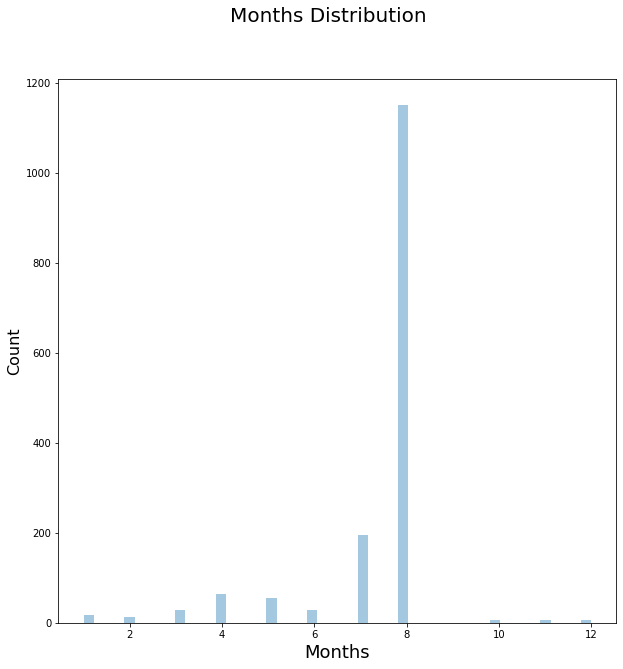

In [9]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['month'], kde=False)
fig.suptitle('Months Distribution', fontsize=20)
plt.xlabel('Months', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

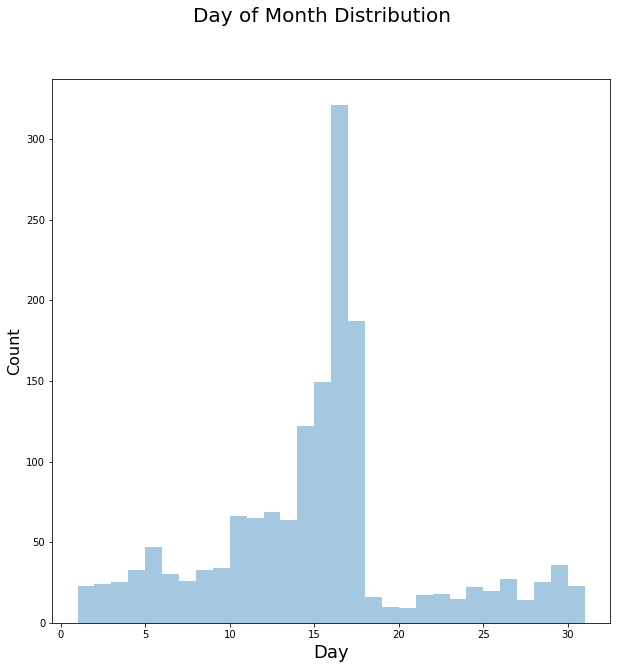

In [10]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['day'], kde=False)
fig.suptitle('Day of Month Distribution', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

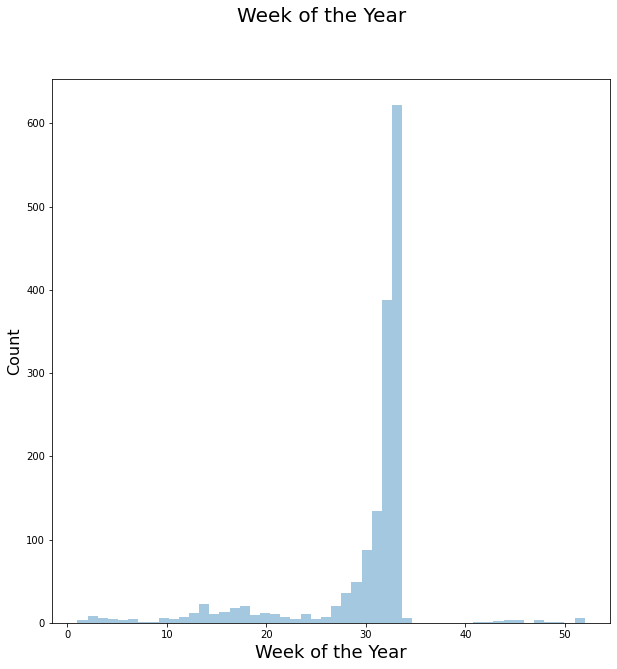

In [11]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['week_of_year'], kde=False)
fig.suptitle('Week of the Year', fontsize=20)
plt.xlabel('Week of the Year', fontsize=18)
plt.ylabel('Count', fontsize=16)

Now we will be using GroupBy and our data columns we have created to easily get the tweets per day, month and week

In [12]:


tweets_pday = main_df[['day','user']].groupby('day').count()
tweets_pday = tweets_pday.rename(columns={'user':'tweets'})


tweets_pweek = main_df[['week_of_year','user']].groupby('week_of_year').count()
tweets_pweek = tweets_pweek.rename(columns={'user':'tweets'})

tweets_pmonth = main_df[['month','user']].groupby('month').count()
tweets_pmonth = tweets_pmonth.rename(columns={'user':'tweets'})


## Results

In [13]:
print(f'Mean tweets per day: { tweets_pday["tweets"].mean() }')
print(f'Median tweets per day: { tweets_pday["tweets"].median() }')
tweets_pday

Mean tweets per day: 50.645161290322584
Median tweets per day: 26.0


,tweets
day,
1,23
2,24
3,25
4,33
5,47
6,30
7,26
8,33
9,34


In [14]:
print(f'Mean tweets per week: { tweets_pweek["tweets"].mean() }')
print(f'Median tweets per week: { tweets_pweek["tweets"].median() }')
tweets_pweek

Mean tweets per week: 35.68181818181818
Median tweets per week: 6.0


,tweets
week_of_year,
1,1
2,2
3,8
4,6
5,4
6,3
7,4
8,1
9,1


In [15]:
print(f'Mean tweets per month: { tweets_pmonth["tweets"].mean() }')
print(f'Median tweets per month: { tweets_pmonth["tweets"].median() }')
tweets_pmonth

Mean tweets per month: 142.72727272727272
Median tweets per month: 28.0


,tweets
month,
1,17
2,12
3,28
4,65
5,54
6,28
7,195
8,1150
10,7


# Free EDA

Now that we got that out of the way, I will explore this data to try to find some interesting data on the user profiles

Let us start with a Correlation Grid

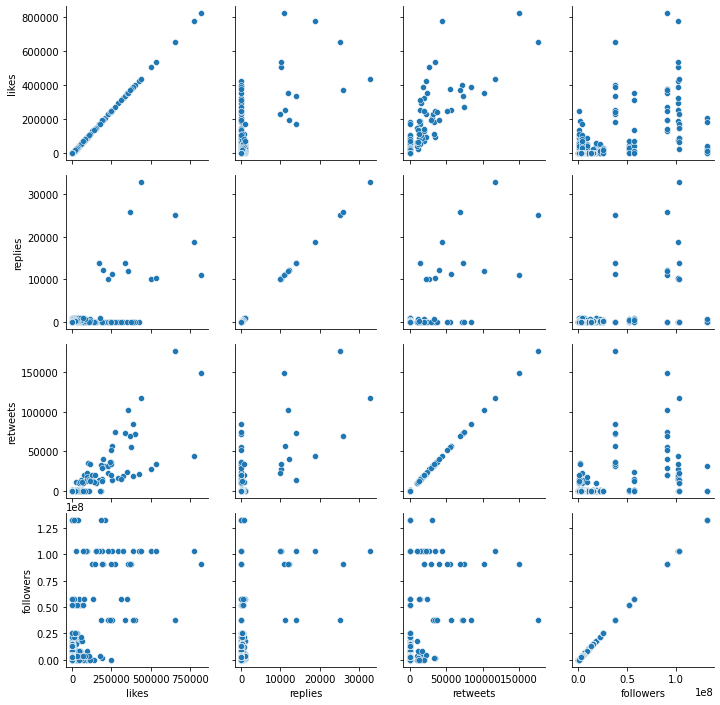

In [16]:
plot = sns.PairGrid(main_df.drop(['day','month','week_of_year'],axis=1))
plot.map(sns.scatterplot)

## Likes, Replies and Retweets

We have already seen that there is little to no correlation between these as of how they are now. The closest we have is between Likes and Retweets which make sense

Now let´s look at the distribution

D:\Users\iuryck\anaconda3\envs\AnalyzeData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

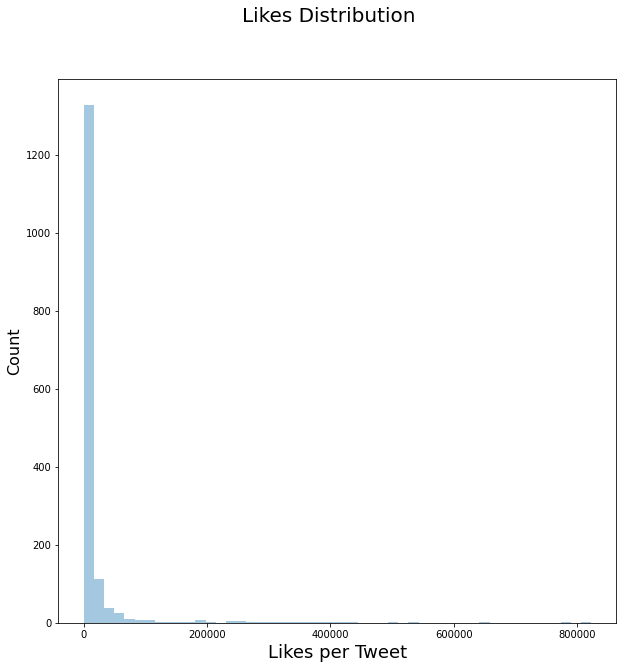

In [17]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['likes'], kde=False)
fig.suptitle('Likes Distribution', fontsize=20)
plt.xlabel('Likes per Tweet', fontsize=18)
plt.ylabel('Count', fontsize=16)


Text(0, 0.5, 'Count')

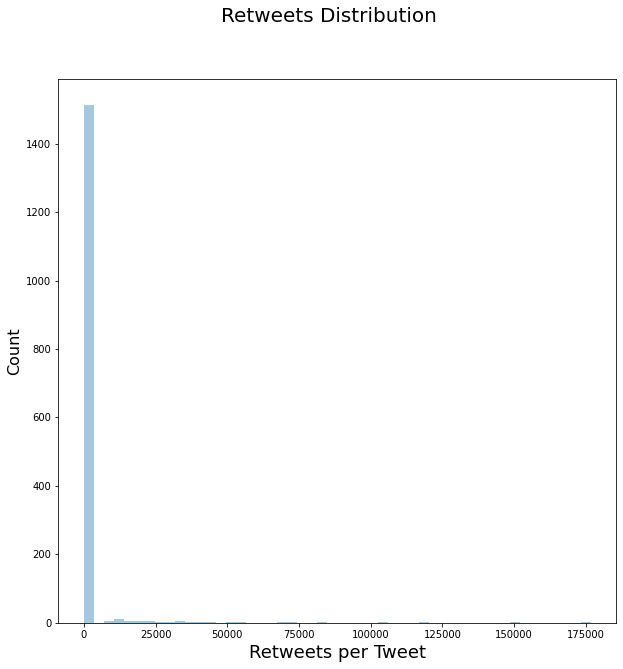

In [18]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['retweets'], kde=False)
fig.suptitle('Retweets Distribution', fontsize=20)
plt.xlabel('Retweets per Tweet', fontsize=18)
plt.ylabel('Count', fontsize=16)


Text(0, 0.5, 'Count')

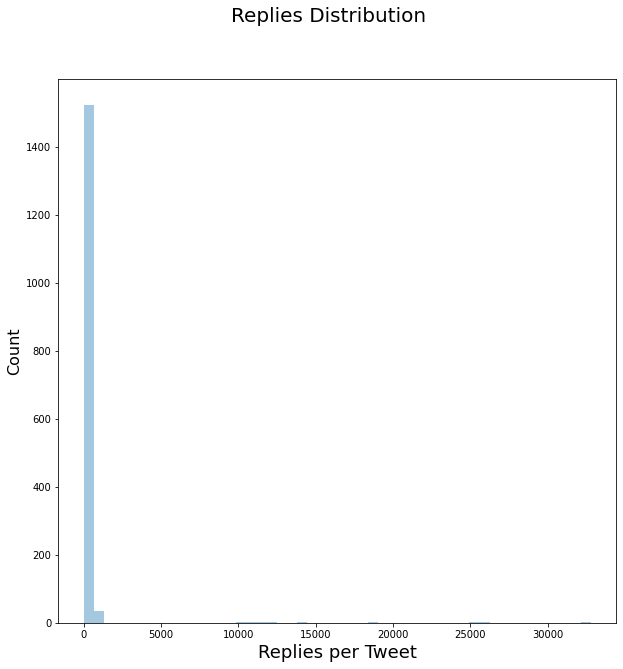

In [19]:
fig = plt.figure(figsize=(10,10))
sns.distplot(x=main_df['replies'], kde=False)
fig.suptitle('Replies Distribution', fontsize=20)
plt.xlabel('Replies per Tweet', fontsize=18)
plt.ylabel('Count', fontsize=16)


As we can see the huge majority of tweets do no get millions of interactions.

This makes our huge influencer/famous/viral tweets the **Outliers** of our data

We can easily get the top 1% of tweets by using the [*3 sigma rule*](https://en.wikipedia.org/wiki/68–95–99.7_rule)

- These are the top of the top tweets by Likes

In [20]:
series = main_df['likes']


mu  = series.mean()
std = series.std()

#Gets all the data that is 3 standard deviations far from the mean
like_outliers = main_df[main_df['likes'] - mu > 3*std]
like_outliers

,date,likes,replies,retweets,user,date_joined,followers,day,month,week_of_year
1559669129535176710,2022-08-16 22:31:12+00:00,208400.0,6.237,30900.0,BarackObama,2007-03-01,132500000.0,16,8,33
1557436132945707008,2022-08-10 18:38:04+00:00,505500.0,10100.000,27100.0,Cristiano,2010-06-01,102800000.0,10,8,32
1553808180332969985,2022-07-31 18:21:53+00:00,776700.0,18800.000,43800.0,Cristiano,2010-06-01,102800000.0,31,7,30
1553390665643573251,2022-07-30 14:42:49+00:00,533600.0,10200.000,34000.0,Cristiano,2010-06-01,102800000.0,30,7,30
1552025605406851072,2022-07-26 20:18:34+00:00,293800.0,8.085,15900.0,Cristiano,2010-06-01,102800000.0,26,7,30
1512160805634166784,2022-04-07 20:10:05+00:00,255300.0,4.939,13600.0,Cristiano,2010-06-01,102800000.0,7,4,14
1510607454505209861,2022-04-03 13:17:37+00:00,422800.0,6.546,21700.0,Cristiano,2010-06-01,102800000.0,3,4,13
1509106128340373510,2022-03-30 09:51:53+00:00,322300.0,5.120,19000.0,Cristiano,2010-06-01,102800000.0,30,3,13
1507758300716277762,2022-03-26 16:36:06+00:00,386000.0,5.218,18700.0,Cristiano,2010-06-01,102800000.0,26,3,12
1507129927598067714,2022-03-24 22:59:10+00:00,190000.0,3.553,14500.0,Cristiano,2010-06-01,102800000.0,24,3,12


- These are the top of the top tweets by Replies

In [21]:
series = main_df['replies']


mu  = series.mean()
std = series.std()

#Gets all the data that is 3 standard deviations far from the mean
replies_outliers = main_df[series - mu > 3*std]
replies_outliers

,date,likes,replies,retweets,user,date_joined,followers,day,month,week_of_year
1557436132945707008,2022-08-10 18:38:04+00:00,505500.0,10100.0,27100.0,Cristiano,2010-06-01,102800000.0,10,8,32
1553808180332969985,2022-07-31 18:21:53+00:00,776700.0,18800.0,43800.0,Cristiano,2010-06-01,102800000.0,31,7,30
1553390665643573251,2022-07-30 14:42:49+00:00,533600.0,10200.0,34000.0,Cristiano,2010-06-01,102800000.0,30,7,30
1559690651687608321,2022-08-16 23:56:43+00:00,171500.0,13900.0,13700.0,elonmusk,2009-06-01,103300000.0,16,8,33
1559691922725281800,2022-08-17 00:01:46+00:00,437200.0,32800.0,117000.0,elonmusk,2009-06-01,103300000.0,17,8,33
1558636751370928128,2022-08-14 02:08:54+00:00,230600.0,10000.0,22700.0,elonmusk,2009-06-01,103300000.0,14,8,32
1522290648790970368,2022-05-05 19:02:28+00:00,250900.0,11200.0,56200.0,Harry_Styles,2010-08-01,38100000.0,5,5,18
1521233317806309377,2022-05-02 21:01:00+00:00,334900.0,13900.0,72600.0,Harry_Styles,2010-08-01,38100000.0,2,5,18
1519865588482330624,2022-04-29 02:26:08+00:00,656000.0,25100.0,176800.0,Harry_Styles,2010-08-01,38100000.0,29,4,17
1540382753677627393,2022-06-24 17:14:02+00:00,823100.0,11000.0,149400.0,taylorswift13,2008-12-01,90800000.0,24,6,25


- And the top of the top tweets by Retweets

In [22]:
series = main_df['retweets']


mu  = series.mean()
std = series.std()

#Gets all the data that is 3 standard deviations far from the mean
retweets_outliers = main_df[series - mu > 3*std]
retweets_outliers

,date,likes,replies,retweets,user,date_joined,followers,day,month,week_of_year
1559669129535176710,2022-08-16 22:31:12+00:00,208400.0,6.237,30900.0,BarackObama,2007-03-01,132500000.0,16,8,33
1553808180332969985,2022-07-31 18:21:53+00:00,776700.0,18800.000,43800.0,Cristiano,2010-06-01,102800000.0,31,7,30
1553390665643573251,2022-07-30 14:42:49+00:00,533600.0,10200.000,34000.0,Cristiano,2010-06-01,102800000.0,30,7,30
1559691922725281800,2022-08-17 00:01:46+00:00,437200.0,32800.000,117000.0,elonmusk,2009-06-01,103300000.0,17,8,33
1153669692273451008,2019-07-23 14:14:23+00:00,96800.0,4.953,35200.0,filipeluis,2010-10-01,1700000.0,23,7,30
1559668535105794048,2022-08-16 22:28:50+00:00,185300.0,4.950,33300.0,Harry_Styles,2010-08-01,38100000.0,16,8,33
1554219412181266433,2022-08-01 21:35:58+00:00,243900.0,4.014,35900.0,Harry_Styles,2010-08-01,38100000.0,1,8,31
1553874059057926149,2022-07-31 22:43:39+00:00,230500.0,3.727,31900.0,Harry_Styles,2010-08-01,38100000.0,31,7,30
1553070519725051911,2022-07-29 17:30:41+00:00,248000.0,3.510,34000.0,Harry_Styles,2010-08-01,38100000.0,29,7,30
1528188268491194373,2022-05-22 01:37:30+00:00,397800.0,7.399,72100.0,Harry_Styles,2010-08-01,38100000.0,22,5,20


This is some nice data, but maybe it is *too* much. We can barely call this a dataset, it's so few tweets. 

We can change this by shrinking our outlier range, our data is super skewed so maybe 1 or 2 standard deviations is enough.

An maybe people like Barack Obama and Taylor Swift are just on a whole different level, let´s exclude them from our analysis as *true outliers*.

In [23]:
series = main_df['likes']


mu  = series.mean()
std = series.std()

#Gets all the data that is between 1 and 3 standard deviations far from the mean
like_outliers = main_df[(series - mu > 1*std) & (series - mu < 3*std)]
like_outliers

,date,likes,replies,retweets,user,date_joined,followers,day,month,week_of_year
1543958093431726080,2022-07-04 14:01:09+00:00,182100.0,3.651,6.405,BarackObama,2007-03-01,132500000.0,4,7,27
1547412864645976064,2022-07-14 02:49:11+00:00,73400.0,1.620,9.068,Brunohenrique,2016-06-01,1800000.0,14,7,28
1518698766009782272,2022-04-25 21:09:36+00:00,72700.0,799.000,20200.000,cabelinhomc,2014-02-01,1600000.0,25,4,17
1507643527760527360,2022-03-26 09:00:02+00:00,75300.0,2.036,4.887,Cristiano,2010-06-01,102800000.0,26,3,12
1559690651687608321,2022-08-16 23:56:43+00:00,171500.0,13900.000,13700.000,elonmusk,2009-06-01,103300000.0,16,8,33
1558867758368133122,2022-08-14 17:26:50+00:00,148900.0,8.841,10600.000,elonmusk,2009-06-01,103300000.0,14,8,32
1558303186326265857,2022-08-13 04:03:26+00:00,88600.0,5.245,6.881,elonmusk,2009-06-01,103300000.0,13,8,32
1555726190450659328,2022-08-06 01:23:22+00:00,149100.0,6.849,10200.000,elonmusk,2009-06-01,103300000.0,6,8,31
1555794448826900480,2022-08-06 05:54:36+00:00,90300.0,1.981,4.456,elonmusk,2009-06-01,103300000.0,6,8,31
1555799183067684866,2022-08-06 06:13:25+00:00,86000.0,4.127,3.845,elonmusk,2009-06-01,103300000.0,6,8,31


That looks a bit better

But now let´s try to define a score of sorts between user profiles.

## Scoring Users on Likes Retweets and Replies

What we will be doing is sum up all the data of each individual user per tweet. So in other words, for each tweet a user has, we will sum the likes, for example, of that user, that way we can make a list of top users based on some profiles.

Some profiles we can derive from this data is:

- Viral: Retweets are a good way to define how viral a tweet is, anyone can agree on that. Now if we made a score for how much retweets a profile gets for all their tweets we can determine how much of a viral profile they are, in other words, how much reach they have. Profiles that fit here are Meme Pages for example


- Engaging: These are profiles that people comment/reply alot, people come to these profiles to discuss, maybe it is even a polemical profile. But what matters here is that we want to see how much a profile attracts user attention with comments and discussion. People with loyal and engaging fan bases might fit into this category, as well as controversial people who attract criticism and hate.


- Popularity(?): Likes are the hard one, they can mean so many things, maybe it's a famous artist, maybe it's a humor page, or someone that has very popular and likeable opinions. Either way at least we can tell one thing, a person that has millions and millions of likes is very popular, people like Barack Obama and Taylor Swift as seen before.

So we will try to transform the data in a way that we can make try to score it into these 3 categories.

Below we will be crunching down the data to better see the distribution of data

Text(0, 0.5, 'Count')

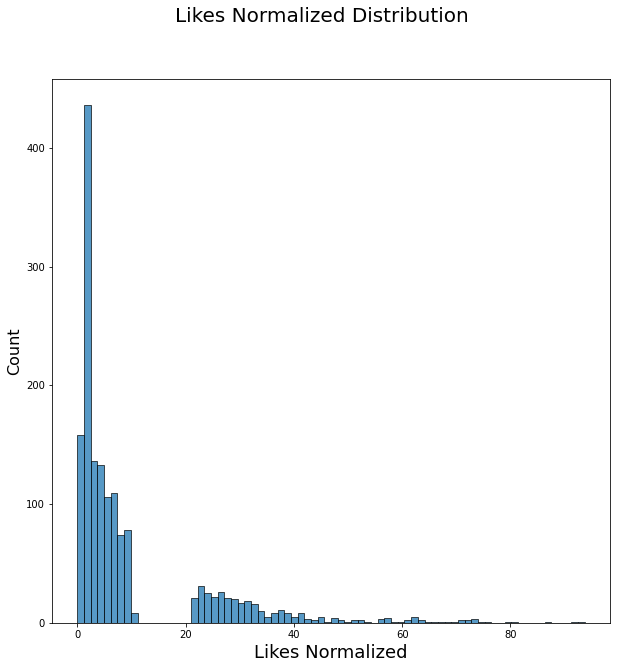

In [24]:


#Crunch down the data with cubic root
main_df['likes_norm'] = main_df['likes']**(1/3)


fig = plt.figure(figsize=(10,10))
sns.histplot(x=main_df['likes_norm'], kde=False)
fig.suptitle('Likes Normalized Distribution', fontsize=20)
plt.xlabel('Likes Normalized', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

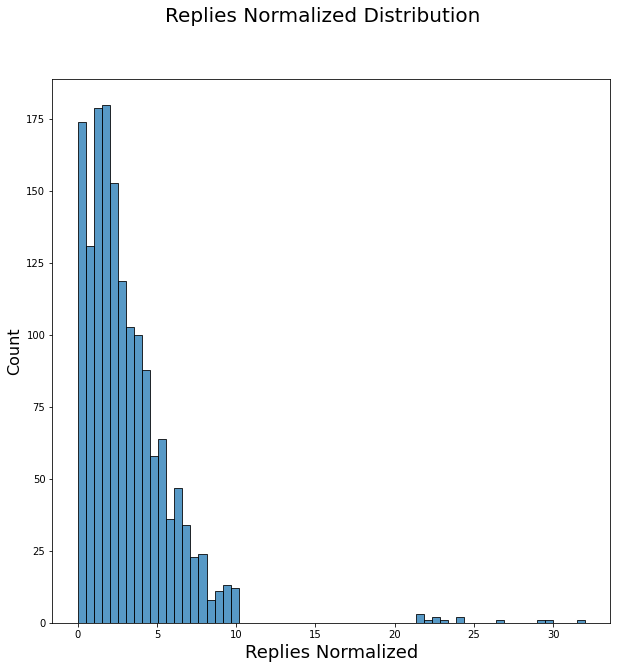

In [25]:
#Crunch down the data with cubic root
main_df['replies_norm'] = (main_df['replies'])**(1/3)

fig = plt.figure(figsize=(10,10))
sns.histplot(x=main_df['replies_norm'], kde=False)
fig.suptitle('Replies Normalized Distribution', fontsize=20)
plt.xlabel('Replies Normalized', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

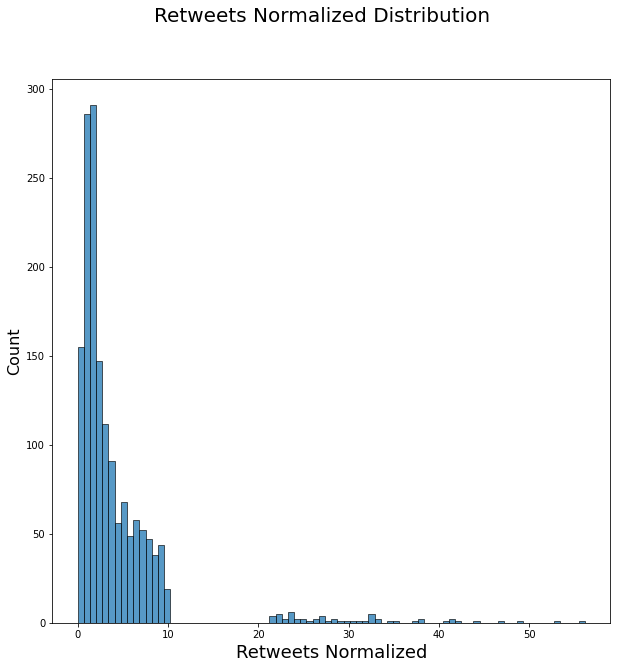

In [26]:
#Crunch down the data with cubic root
main_df['retweets_norm'] = main_df['retweets']**(1/3)

fig = plt.figure(figsize=(10,10))
sns.histplot(x=main_df['retweets_norm'], kde=False)
fig.suptitle('Retweets Normalized Distribution', fontsize=20)
plt.xlabel('Retweets Normalized', fontsize=18)
plt.ylabel('Count', fontsize=16)

If a product is retweeted, and gets alot of likes, that is good. But if a product is retweeted and gets alot of replies, then the product might be in discussion and it will bring more people in, and that is free advertisement. With this in mind we will define features in which we evaluate a users tweet value by how many likes they get per retweet and how many replies they get per retweet

Text(0, 0.5, 'Count')

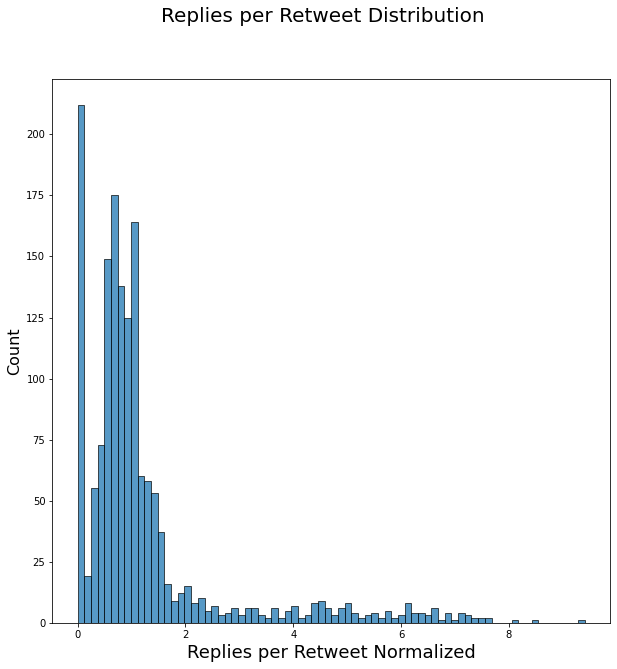

In [27]:
#Adding ones to our 0 values so we dont get NaNs
main_df.loc[main_df.retweets==0, 'retweets'] = 1

#Get how many replies per tweet, then crunch data
main_df['retweet_engagement'] = (main_df['replies']/main_df['retweets'])**(1/3)

fig = plt.figure(figsize=(10,10))
sns.histplot(x=main_df['retweet_engagement'], kde=False)
fig.suptitle('Replies per Retweet Distribution', fontsize=20)
plt.xlabel('Replies per Retweet Normalized', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

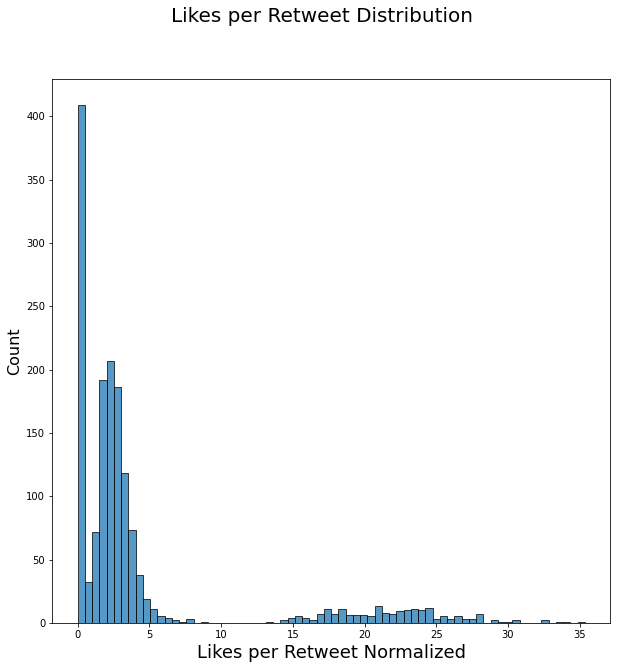

In [28]:
#Get how many replies per tweet, then crunch data
main_df['retweet_likes'] = (main_df['likes']/main_df['retweets'])**(1/3)

fig = plt.figure(figsize=(10,10))
sns.histplot(x=main_df['retweet_likes'], kde=False)
fig.suptitle('Likes per Retweet Distribution', fontsize=20)
plt.xlabel('Likes per Retweet Normalized', fontsize=18)
plt.ylabel('Count', fontsize=16)

## Telling from Distributions

From the distributions we can see that it is a very select few tweets that actually get a lot of exposure. So already we are somewhat limited in our analysis to find marketing valuable users/tweets. Not to mention we are limited by the amount of tweets we have and their timespan.

But we can still find some interesting things. Let's create some variables that can show us some interesting things.

Here are the users that have gained the most amount of followers per day since they created their account. This might show us people that have a insane amount of growth in a short timespan.

In [29]:

main_df['account_active_days'] = [(dt.datetime.now() - c).days for c in main_df['date_joined']]
main_df['followers_p_active_days'] = main_df['followers']/main_df['account_active_days']
main_df.sort_values('followers_p_active_days', ascending=False)[['followers_p_active_days','user']].drop_duplicates().head(10)


,followers_p_active_days,user
1543951107403153408,23455.478846,BarackObama
1510607454505209861,23044.160502,Cristiano
1558867758368133122,21404.890178,elonmusk
1429827296060391432,18130.990415,taylorswift13
1558045231785836544,12911.903161,neymarjr
1550255527632031744,10573.403823,KingJames
1519865588482330624,8659.090909,Harry_Styles
1551664846583877642,6007.480131,whindersson
1558501188701753351,5882.352941,luvadepedreiro
1557383666690580480,5119.214586,NetflixBrasil


Look at this user, a million followers in a few months! Certainly a viral user.

In [30]:
main_df[main_df['user']=='luvadepedreiro'][['user','date_joined','followers']].drop_duplicates()

,user,date_joined,followers
1559723641096572928,luvadepedreiro,2022-03-01,1000000.0


Now let´s sum up the data for evey profile page

In [31]:
users_scores = main_df[['likes', 'retweets','replies','user','retweet_engagement','retweet_likes']].groupby('user').sum()
users_scores.head(10)

,likes,retweets,replies,retweet_engagement,retweet_likes
user,,,,,
Anitta,208003.791,11897.535,5614.919,36.937562,119.521257
Astronomiaum,24298.213,2688.160,430.000,7.249242,24.641890
BarackObama,516715.340,30930.678,1930.762,29.495008,143.872647
BlogdoJuca,1116.000,83.000,33.000,10.109576,27.932175
BoliviaMod,792.152,475.000,87.000,12.632092,32.692219
Brasileirao,3611.334,1041.000,225.000,7.907691,22.436906
BruMarquezine,781.598,925.000,648.000,9.452732,6.089292
Brunohenrique,335106.422,2847.706,2881.908,29.304499,157.966929
CBF_Futebol,1893.976,754.000,196.000,7.674993,18.197066


Top 10 users with the most amount of Likes on their tweets

In [32]:
users_scores.sort_values('likes', ascending=False).head(10)[['likes']]

,likes
user,
Cristiano,3761300.000
Harry_Styles,3181000.000
taylorswift13,3098200.000
elonmusk,1495800.000
neymarjr,945116.341
vinijr,697500.000
unidadeAbsoluta,552132.011
BarackObama,516715.340
maiconkusterk,435209.814


Top 10 users with the most amount of Replies on their tweets 

In [33]:

users_scores.sort_values('replies', ascending=False).head(10)[['replies']]

,replies
user,
taylorswift13,61133.124
elonmusk,56734.919
Harry_Styles,50238.500
Cristiano,39135.497
Anitta,5614.919
cellbit,4783.231
neymarjr,4289.733
vinijr,4199.474
GiorgiandeA,4113.653


Top 10 users with the most amount of Retweets on their tweets 

In [34]:
users_scores.sort_values('retweets', ascending=False).head(10)[['retweets']]

,retweets
user,
Harry_Styles,634300.000
taylorswift13,610500.000
Cristiano,208304.887
elonmusk,174222.141
neymarjr,53919.423
unidadeAbsoluta,45755.934
macacosfoda,39620.151
filipeluis,37922.777
thomassantanas,34406.992


Notice how some users change and shift places, indicating a sort of profile. A user may not have many like on their tweets but have alot of retweets or replies. And with that they show up in the top 10 of one datasample and disappear in the other. Like the user cellbit that shows only in the top 10 users by replies. This might indicate some user activity that is really rallying people together (as a person that follows the user, I can confirm there is).

Now a variable that might interest more in a marketing point of view are Retweets. If a user has a lot of retweets then they have alot of range, and we want to evaluate the quality of that range as well. Replies generate engagement and advertisement of said tweet, while Like may represent popularity or likeability of the tweet. So we can try to evaluate a users reach by getting the likes and replies per retweet. This will also help us in profiling a user.

Below are the top 10 profiles by replies per tweet. As we can see here, the user cellbit we talked about has yet again appeared in a data sample about engagement, this can indicate the user generates alot of engagement and discussion with their tweets. Notice also how some user will have more engagement per retweet, but less retweets than others. This might tell us that even though the user does not have the most retweets, they can make each one count.

In [35]:

users_scores.sort_values('retweet_engagement', ascending=False).head(10)[['retweets','retweet_engagement']]

,retweets,retweet_engagement
user,,
KingJames,986.232,43.904910
GiorgiandeA,625.060,42.802027
cellbit,1469.180,42.094407
vinijr,1471.509,40.105390
Anitta,11897.535,36.937562
maiconkusterk,14443.571,30.916526
BarackObama,30930.678,29.495008
matue30,1961.017,29.412055
Brunohenrique,2847.706,29.304499


Here we have the likes per retweet

In [36]:
users_scores.sort_values('retweet_likes', ascending=False).head(10)[['retweets','retweet_likes']]

,retweets,retweet_likes
user,,
vinijr,1471.509,236.367152
GiorgiandeA,625.060,212.591078
KingJames,986.232,198.329530
gabigol,22236.217,194.864965
maiconkusterk,14443.571,162.933864
Brunohenrique,2847.706,157.966929
cellbit,1469.180,155.758866
BarackObama,30930.678,143.872647
shitpostverdade,937.407,141.092007


# Conclusion

Although the data in the current state is limiting, it has lots of potential. A lot here can be used as *trailing data* if we had more, which would show users trending and falling in the eyes of the public over time. Maybe even use Natural Language Processing to get Sentiment Analysis data and compare that to likes, retweets and replies. I hope I was able to explain the ideas and presentations made in this notebook clearly and that I was able to achieve the expectations to this test. 